### Các thư viện cần thiết

In [121]:
%pip install matplotlib pandas numpy seaborn wordcloud ast langdetect pycountry


  Using cached AST-0.0.2.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Admin\AppData\Local\Temp\pip-install-tyvjcjoo\ast_e9e482745e1e47da888c402922886edd\setup.py", line 6, in <module>
          README = codecs.open(os.path.join(here, 'AST/README'), encoding='utf8').read()
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\codecs.py", line 906, in open
          file = builtins.open(filename, mode, buffering)
      FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-tyvjcjoo\\ast_e9e482745e1e47da888c402922886edd\\AST/README'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ast  

### Đọc file csv đã crawl được

In [123]:
post_df_full = pd.read_csv('Data/Asphalt9LegendsAfterPreprocessingData.csv')
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        167 non-null    int64  
 1   text                           167 non-null    object 
 2   post_text                      167 non-null    object 
 3   shared_text                    7 non-null      object 
 4   original_text                  30 non-null     object 
 5   time                           167 non-null    object 
 6   timestamp                      167 non-null    float64
 7   image                          137 non-null    object 
 8   image_lowquality               163 non-null    object 
 9   images                         167 non-null    object 
 10  images_description             167 non-null    object 
 11  images_lowquality              167 non-null    object 
 12  images_lowquality_description  167 non-null    obj

In [124]:
post_df_full

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,image_id,image_ids,video_ids,videos,was_live,fetched_time,post_len,total_interact,date,hour_in_day
0,671157358504395,The new track is a masterpiece of automotive d...,The new track is a masterpiece of automotive d...,NaN,The new track is a masterpiece of automotive d...,2023-11-27 23:00:10,1.701101e+09,https://scontent.fhan5-2.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-2.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-2.fna.fbcdn.net/v/t39...,...,NaN,[],[],[],False,2023-11-28 22:58:08.084042,339,1303,2023-11-27,23
1,669458188674312,Feel the rush of speed and power as you speed ...,Feel the rush of speed and power as you speed ...,NaN,Feel the rush of speed and power as you speed ...,2023-11-25 23:00:06,1.700928e+09,NaN,https://scontent.fhan5-2.fna.fbcdn.net/v/t39.3...,[],...,6.694581e+14,['669458058674325'],NaN,NaN,False,2023-11-28 22:58:49.699185,276,452,2023-11-25,23
2,669448552008609,"After Firebreak's cliffhanger ending, we conti...","After Firebreak's cliffhanger ending, we conti...",NaN,"After Firebreak's cliffhanger ending, we conti...",2023-11-24 20:00:29,1.700831e+09,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-1.fna.fbcdn.net/v/t39...,...,6.694480e+14,['669447952008669'],NaN,NaN,False,2023-11-28 22:59:09.947510,542,424,2023-11-24,20
3,668880865398711,The Bugatti Chiron Super Sport 300+ is coming ...,The Bugatti Chiron Super Sport 300+ is coming ...,NaN,NaN,2023-11-24 00:00:08,1.700759e+09,NaN,https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...,[],...,6.688806e+14,['668880628732068'],NaN,NaN,False,2023-11-28 22:59:24.362290,207,517,2023-11-24,0
4,668879955398802,Check out this video to find out more about al...,Check out this video to find out more about al...,NaN,Check out this video to find out more about al...,2023-11-23 20:20:02,1.700746e+09,NaN,https://scontent.fhan5-1.fna.fbcdn.net/v/t15.5...,[],...,NaN,[],NaN,NaN,False,2023-11-28 22:59:48.940311,238,256,2023-11-23,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,583549550598510,📸🏎️ Share a screenshot of 3 cars from your in-...,📸🏎️ Share a screenshot of 3 cars from your in-...,NaN,NaN,2023-06-18 23:00:02,1.687104e+09,NaN,https://scontent.fhan5-8.fna.fbcdn.net/m1/v/t6...,[],...,NaN,[],NaN,NaN,False,2023-11-28 23:47:58.893042,167,343,2023-06-18,23
163,582276487392483,"With hundreds of cars to add to your garage, w...","With hundreds of cars to add to your garage, w...",YOUTUBE.COM\nAsphalt 9 - BEST CARS FOR BEGINNERS!,NaN,2023-06-17 22:00:02,1.687014e+09,NaN,https://external.fhan5-8.fna.fbcdn.net/emg1/v/...,[],...,NaN,[],NaN,NaN,False,2023-11-28 23:48:12.100051,176,140,2023-06-17,22
164,582472227372909,Passion and dedication led Rimac's interior ca...,Passion and dedication led Rimac's interior ca...,NaN,NaN,2023-06-16 22:25:21,1.686929e+09,https://scontent.fhan15-2.fna.fbcdn.net/v/t39....,https://scontent.fhan15-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan15-2.fna.fbcdn.net/v/t3...,...,NaN,[],[],[],False,2023-11-28 23:48:25.268740,317,555,2023-06-16,22
165,578027437817388,✨🐾LEGENDARY HUNT🐾✨\n\nUnlock this iconic beaut...,✨🐾LEGENDARY HUNT🐾✨\n\nUnlock this iconic beaut...,NaN,NaN,2023-06-15 22:00:01,1.686841e+09,https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...,https://scontent.fhan5-9.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan5-9.fna.fbcdn.net/v/t39...,...,5.780272e+14,['578027181150747'],NaN,NaN,False,2023-11-28 23:48:36.160699,164,335,2023-06-15,22


# Phân tích dữ liệu

## Phân tích số lượng reaction theo ngày

In [125]:
dates=post_df_full['date'].to_list()
y=post_df_full['reaction_count'].to_list()

dates.reverse()
y.reverse()

In [126]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dates, y=y, mode='lines', name='Line'))
fig.add_trace(go.Scatter(x=dates, y=y, fill='tozeroy', name='Fill'))

fig.update_layout(
    title="TỔNG LƯỢNG REACTION THEO THỜI GIAN",
    xaxis=dict(title='Thời gian'),
    yaxis=dict(title='Tổng số lượng reaction'),
    width=800,
    height=400
)

fig.show()


In [127]:
print("tổng số lượng reaction: ", post_df_full['reaction_count'].sum())
print("số lượng reaction cao nhất: ", post_df_full['reaction_count'].max())
print("số lượng reaction thấp nhất: ", post_df_full['reaction_count'].min())
print("số lượng reaction trung bình: ", post_df_full['reaction_count'].mean())

tổng số lượng reaction:  80850
số lượng reaction cao nhất:  5582
số lượng reaction thấp nhất:  62
số lượng reaction trung bình:  484.1317365269461


In [128]:
post_df_full_with_reactions = pd.read_csv('Data/Post_df_full_with_reactions.csv')

In [129]:
#Biểu đồ sự thay đổi của các loại tương tác theo thời gian
fig = px.line(post_df_full_with_reactions, x='time', 
              y=['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'shares', 'comments'],
              labels={'value': 'Tổng số lượng reaction', 'time': 'Thời gian'},
              title='SỰ THAY ĐỔI CỦA CÁC LOẠI TƯƠNG TÁC THEO THỜI GIAN')

fig.show()

Đánh giá: Cảm xúc "Thích" là cảm xúc phổ biến nhất mà người theo dõi sử dụng

## Sự tương quan giữa số lượng reaction, số lượng comment, số lượng share và độ dài bài viết

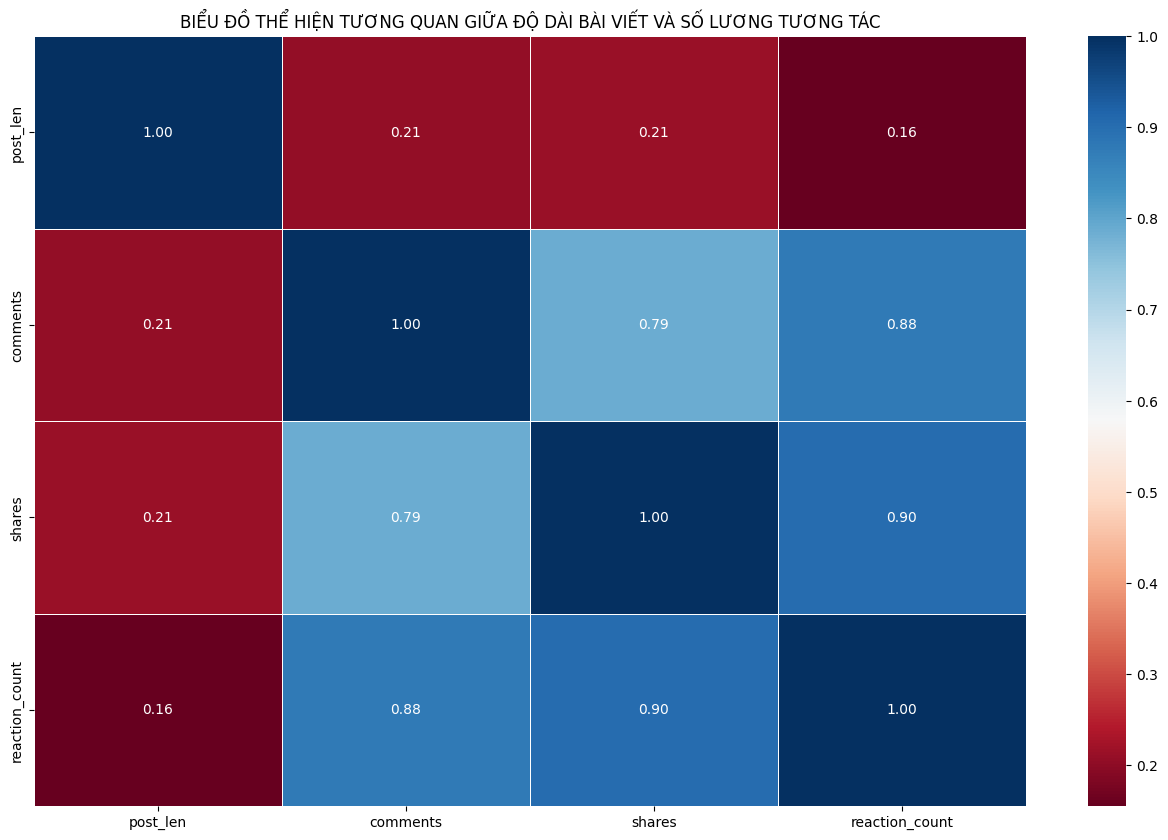

In [130]:
corr = post_df_full[['post_len', 'comments', 'shares', 'reaction_count']].corr()

fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='RdBu', fmt=".2f", linewidths=.5, ax=ax)

ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.index)

plt.title("BIỂU ĐỒ THỂ HIỆN TƯƠNG QUAN GIỮA ĐỘ DÀI BÀI VIẾT VÀ SỐ LƯƠNG TƯƠNG TÁC")
plt.show()

## Bài viết có lượng tương tác lớn nhất trong bộ dữ liệu

In [131]:
#in ra bài viết có lượng tương tác lớn nhất
print(post_df_full["text"].loc[post_df_full['total_interact'].idxmax()])

✨CONTEST ALERT! ✨

Join us in celebrating 5 years of Asphalt 9: Legends for a chance to win in-game rewards and 85 blueprints for the incredible Hennessey Venom F5!

To participate in the contest, let us know your best memory in Asphalt 9: Legends in the comments section!

#Asphalt9Legends #A9versary

✨THÔNG BÁO CUỘC THI! ✨

Hãy tham gia cùng chúng tôi kỷ niệm 5 năm Asphalt 9: Huyền thoại để có cơ hội giành được phần thưởng trong trò chơi và 85 bản thiết kế cho Hennessey Venom F5 tuyệt vời!

Để tham gia cuộc thi, hãy cho chúng tôi biết kỷ niệm đẹp nhất của bạn trong Asphalt 9: Huyền thoại trong phần bình luận!

#Asphalt9Legends #A9versary


In [132]:
print("lượng tương tác: ", post_df_full["total_interact"].loc[post_df_full['total_interact'].idxmax()])
print("lượng reaction: ",post_df_full["reaction_count"].loc[post_df_full['total_interact'].idxmax()])
print("lượng comment: ",post_df_full["comments"].loc[post_df_full['total_interact'].idxmax()])
print("lượng share: ",post_df_full["shares"].loc[post_df_full['total_interact'].idxmax()])

lượng tương tác:  10324
lượng reaction:  5582
lượng comment:  4554
lượng share:  188


## Các mốc thời gian trong ngày mà fanpage thường xuyên đăng bài 

In [133]:
value_counts_df = post_df_full['hour_in_day'].value_counts().reset_index()
value_counts_df.columns = ['Giờ đăng bài', 'Số lượng bài viết']

fig = px.bar(value_counts_df, x='Giờ đăng bài', y='Số lượng bài viết',
             labels={'Số lượng bài viết': 'Số lượng bài viết', 'Giờ đăng bài': 'Giờ đăng bài'},
             title="THỜI GIAN ĐĂNG BÀI TRONG NGÀY CỦA PAGE")

fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)

fig.show()


Page thường xuyên đăng bài trong khoảng từ 22h trong ngày

## So sánh lượng reaction theo thời gian đăng bài

In [134]:
hourly_reaction = post_df_full.groupby('hour_in_day')['total_interact'].mean()

fig = go.Figure(data=[go.Bar(x=hourly_reaction.index, y=hourly_reaction.values)])

fig.update_layout(
    title='TRUNG BÌNH TƯƠNG TÁC VỚI MỖI THỜI GIAN ĐĂNG BÀI',
    xaxis_title='Giờ đăng bài',
    yaxis_title='Tổng số lượng reaction',
    bargap=0.2,  # Điều chỉnh khoảng cách giữa các cột
    width=800,   # Điều chỉnh độ rộng của biểu đồ
    height=400   # Điều chỉnh độ cao của biểu đồ
)

fig.show()


## các từ khóa xuất hiện nhiều nhất trong các bài đăng được thu thập

In [135]:
full_post_text = str()
for i in range(0, len(post_df_full)):
    full_post_text = full_post_text + " " + str(post_df_full['post_text'].iloc[i])

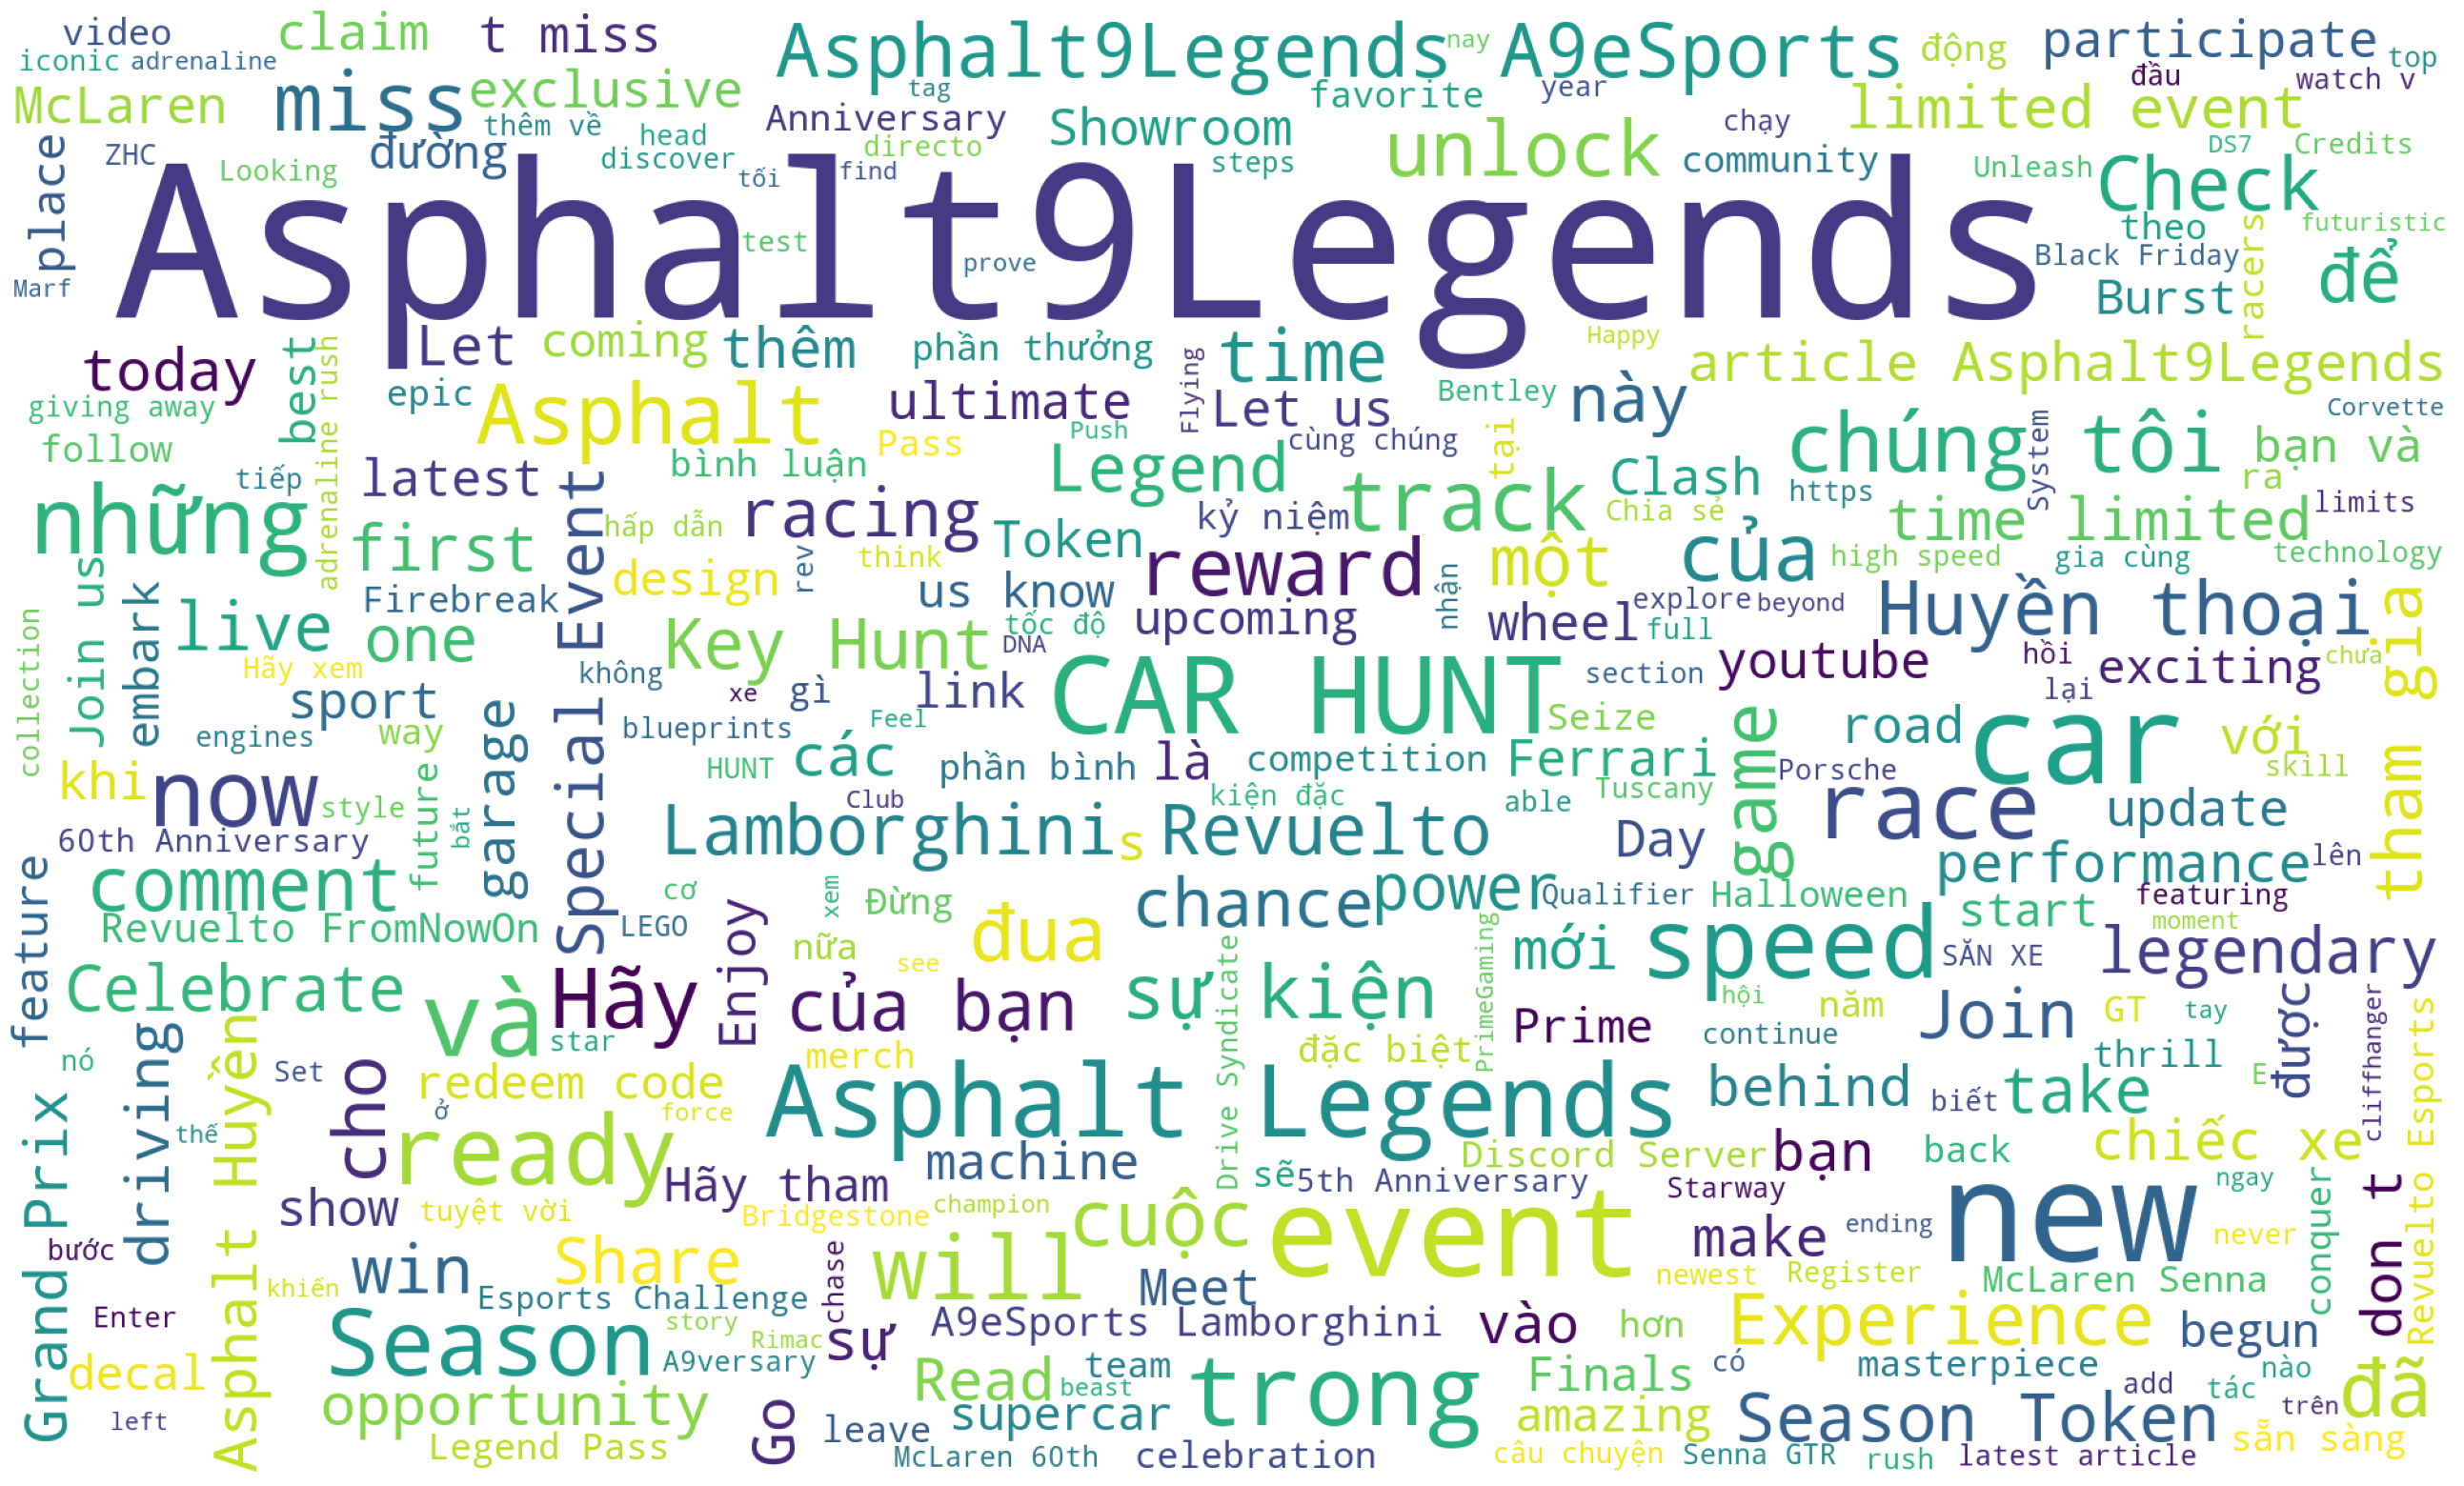

In [136]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=300,
                      width=2000, height=1200).generate(full_post_text)

plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

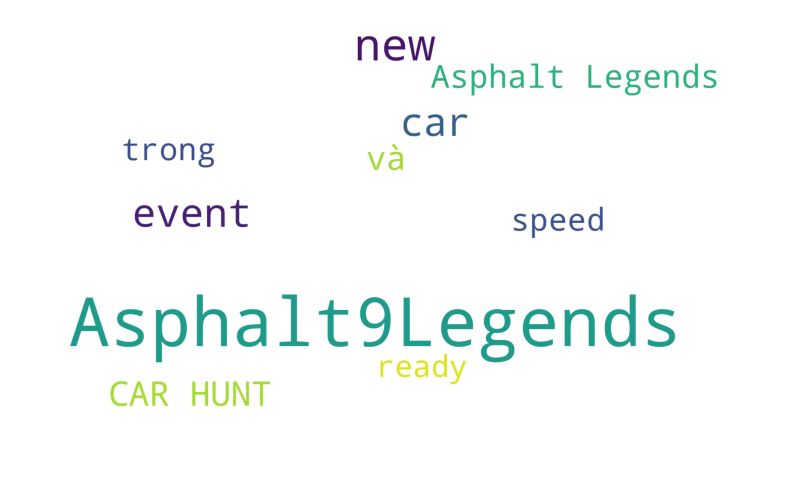

In [137]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=10,
                      width=2000, height=1200).generate(full_post_text)

plt.figure(figsize=(14,6))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Xét 10 từ xuất hiện nhiều nhất trong các bài đăng:
- car
- new
- event
- speed
- CAR HUNT
- ready

Các từ khá bị loại vì là tên và do có trong bản dịch chứ không phải bản gốc

In [138]:
#xét 10 từ khóa dc xuất hiện nhiều nhất trong các bài đăng  
popular_word = ["car", "new", "event", "speed", "CAR HUNT", "ready"]
popular_word_data = pd.DataFrame(columns=['time', "car", "new", "event", "speed", "CAR HUNT", "ready"])


for i in range(len(post_df_full)):
    for word in popular_word:
        popular_word_data['time'] = post_df_full['date']
        popular_word_data[word].iloc[i] = post_df_full['text'].iloc[i].count(word)
    
popular_word_data['time'] = pd.to_datetime(popular_word_data['time'])
popular_word_data['month'] = popular_word_data['time'].dt.to_period('M')

word_data = popular_word_data.groupby('month')[popular_word].sum()

word_data.index = word_data.index.astype(str)

In [139]:
fig = go.Figure()

for word in popular_word:
    fig.add_trace(go.Scatter(x=word_data.index, y=word_data[word], mode='lines', name=word))

fig.update_layout(
    title="SỐ LẦN XUẤT HIỆN CỦA CÁC TỪ PHỔ BIẾN TRONG CÁC BÀI ĐĂNG",
    xaxis=dict(title='Thời gian theo tháng'),
    yaxis=dict(title='Số lần xuất hiện'),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    autosize=False,
    width=800,
    height=400,
)

fig.show()

## Phân tích sự thay đổi của reaction theo các bài đăng có ảnh hoặc video

In [140]:
post_have_image = post_df_full.loc[post_df_full['image'].notna()]
post_have_video = post_df_full.loc[post_df_full['video'].notna()]
post_have_image_and_video = post_df_full.loc[(post_df_full['image'].notna()) & (post_df_full['video'].notna())]
post_not_have_image_and_video = post_df_full.loc[(post_df_full['image'].isna()) & (post_df_full['video'].isna())]

In [141]:
labels = ['not_have_image/video', 'have_image_and_video', 'have_video', 'have_image']
sizes = [len(post_not_have_image_and_video), len(post_have_image_and_video), len(post_have_video), len(post_have_image)]

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, textinfo='label+percent', pull=[0, 0.1, 0, 0])])
fig.update_layout(title="TỈ LỆ CÁC BÀI ĐĂNG CHỨA ẢNH HOẶC VIDEO")

fig.show()


Đánh giá: Đa số các bài đăng của Page là chứa hình ảnh và không có bài viết nào là chứ cả hình ảnh và video

In [142]:
interact = [post_not_have_image_and_video['total_interact'].mean(), 
            post_have_image_and_video['total_interact'].mean(),
            post_have_video['total_interact'].mean(), 
            post_have_image['total_interact'].mean()]

fig = go.Figure(data=[go.Bar(x=labels, y=interact)])

fig.update_layout(
    xaxis=dict(tickangle=-45),
    yaxis=dict(title='Lương tương tác trung bình'),
    title='LƯỢNG TƯƠNG TÁC TRUNG BÌNH VỚI CÁC BÀI ĐĂNG CHỨA ẢNH HOẶC VIDEO'
)

fig.show()


Đánh giá: Các bài đăng có chứa video có nhiều lượt tương tác hơn

Kết luận: thời gian đăng bài có ảnh hưởng đến số lượng reaction. theo biểu đồ trên thời gian đăng bài có lượt reaction trung bình nhiều nhất là 15h

## Phân tích ngôn ngữ của người dùng thông qua các bình luận

In [143]:
from langdetect import detect
import pycountry

language_data = {}

def detect_language_full_name(text):
    try:
        language_code = detect(text)
        return pycountry.languages.get(alpha_2=language_code).name
    except Exception as e:
        print("Error:", e)


for i in range(len(comment_data)):
    language = detect_language_full_name(comment_data['comment_text'].iloc[i])
    if language != None:
        if language in language_data:
            language_data[language] += 1
        else:
            language_data[language] = 1

language_data


Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: 'NoneType' object has no attribute 'name'


{'English': 29,
 'Dutch': 1,
 'Afrikaans': 2,
 'Italian': 3,
 'Polish': 2,
 'Vietnamese': 7,
 'Swedish': 1,
 'Spanish': 6,
 'Indonesian': 2,
 'Welsh': 1,
 'French': 1,
 'Romanian': 1,
 'Norwegian': 1,
 'Somali': 1,
 'Hungarian': 1}

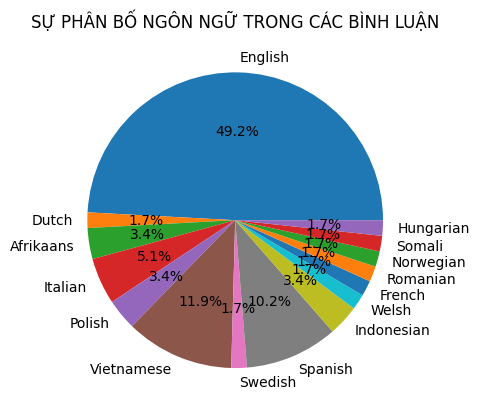

In [144]:
# Tách dữ liệu
languages = list(language_data.keys())
values = list(language_data.values())

# Vẽ biểu đồ hình quạt
plt.pie(values, labels=languages, autopct='%1.1f%%')
plt.title('SỰ PHÂN BỐ NGÔN NGỮ TRONG CÁC BÌNH LUẬN')
plt.show()

Kết luận: Gần 1 nữa người dùng bình luận ở các bài viết trên fanpage này sử dụng Tiếng Anh

## Phân tích các bài đăng có số lượng reaction cao

In [145]:
#Lấy 10 bài đăng có nhiều lượng tương tác nhất
top_10_interact_post_data = post_df_full.sort_values('total_interact').head(10)

for post in top_10_interact_post_data["text"]:
    print(post)

🏁 It's time to settle the score! Fusion III or RPM Nemesis? See what JägerMajsterrr thinks in his latest video featuring these circuit favorites. But let us know what you think, which of these two titans do you think is the Club Clash champion?

https://www.youtube.com/watch?v=xwKpoDccl2s

#Asphalt9Legends

YOUTUBE.COM
ASPHALT 9 - CLUB CLASH - FUSION III vs RPM NEMESIS - DEFENCE & ATTACK RACES
Marf takes one of the Clash cars for a spin: the Volkswagen Electric R!

Do you have it in your garage yet?
https://www.youtube.com/watch?v=DbKaJTSewlM

#Asphalt9Legends

YOUTUBE.COM
Should you buy the Volkswagen Electric R? - Asphalt 9 REVIEW
How are your clash rounds going, Legends? 😎
JägerMajsterrr showcased his top tier skills in his latest Club Clash compilation.

Check it out!
#Asphalt9Legends



YOUTUBE.COM
ASPHALT 9 - CLUB CLASH [ft. @johngiegie2346 ] - FUSION III vs LEGIO IX - DEFENCE & ATTACK RACES
Learn from the best!

This time Nox Fury is comparing manual vs touchdrive in his latest 

### Đánh giá
Asphalt9Legends là một fanpage về ứng dụng game nên các bài đăng có nhiều tương tác hơn trung bình thường là những bài viết liên quan đến các cập nhật về game như là các tính năng mới, các trung phục mới; hoặc là các thông tin liên quan đến sự kiện giảm giá hoặc là về các giải đấu trong game.